<a href="https://colab.research.google.com/github/ahmedmustafaelazab/sleep-analysis-project./blob/main/Life_Factors_%26_Sleep_Quality_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#: تعريف المشروع
تحليل بيانات النوم والعوامل المؤثرة (العمر، النشاط، مؤشر كتلة الجسم، الضغط، القلق… إلخ)
# : الهدف
استكشاف الاختلافات بين العوامل الحيوية وجود النوم

In [ ]:
 #Import Libraries
 import pandas as pd
 import matplotlib.pyplot as plt
 import numpy as np
 import seaborn as sns

In [ ]:
#Load Dataset
data= pd.read_csv("/content/sleep.csv")
data.head()

,personal ID,gender,age,occupations,sleep duration,quality of sleep,physical activity level,stress level,BMI category,Blood Pressure,heart rate,daily steps,sleep Disorder
0,SLP001,Male,40,Teacher,4.81,2,44,5,Normal,121/84,59,30000,Sleep Apnea
1,SLP002,Female,65,Freelancer,6.89,3,42,8,Normal,127/87,81,30000,NaN
2,SLP003,Female,41,Security,3.50,1,47,10,Normal,126/78,76,30000,Insomnia
3,SLP004,Female,46,Nurse,7.47,4,49,8,Normal,124/72,72,30000,NaN
4,SLP005,Male,45,Driver,7.32,4,28,5,Overweight,119/83,70,27600,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   personal ID              274 non-null    object 
 1   gender                   274 non-null    object 
 2   age                      274 non-null    int64  
 3   occupations              274 non-null    object 
 4   sleep duration           274 non-null    float64
 5   quality of sleep         274 non-null    int64  
 6   physical activity level  274 non-null    int64  
 7   stress level             274 non-null    int64  
 8   BMI category             274 non-null    object 
 9   Blood Pressure           274 non-null    object 
 10  heart rate               274 non-null    int64  
 11  daily steps              274 non-null    int64  
 12  sleep Disorder           108 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 28.0+ KB


In [ ]:
data.describe(include="all")

,personal ID,gender,age,occupations,sleep duration,quality of sleep,physical activity level,stress level,BMI category,Blood Pressure,heart rate,daily steps,sleep Disorder
count,274,274,274.000000,274,274.000000,274.000000,274.000000,274.000000,274,274,274.000000,274.000000,108
unique,274,2,NaN,20,NaN,NaN,NaN,NaN,4,243,NaN,NaN,2
top,SLP274,Male,NaN,Accountant,NaN,NaN,NaN,NaN,Normal,121/84,NaN,NaN,Insomnia
freq,1,140,NaN,22,NaN,NaN,NaN,NaN,113,3,NaN,NaN,79
mean,NaN,NaN,35.616788,NaN,6.182701,3.532847,47.218978,6.923358,NaN,NaN,75.773723,28418.613139,NaN
std,NaN,NaN,9.724551,NaN,1.248181,1.859738,18.467163,1.539933,NaN,NaN,8.362215,4613.276617,NaN
min,NaN,NaN,18.000000,NaN,3.500000,1.000000,0.000000,3.000000,NaN,NaN,51.000000,500.000000,NaN
25%,NaN,NaN,28.000000,NaN,5.300000,2.000000,34.250000,6.000000,NaN,NaN,70.000000,30000.000000,NaN
50%,NaN,NaN,35.000000,NaN,6.200000,3.000000,46.000000,7.000000,NaN,NaN,76.000000,30000.000000,NaN
75%,NaN,NaN,42.000000,NaN,7.010000,5.000000,60.000000,8.000000,NaN,NaN,81.000000,30000.000000,NaN


# Based on the descriptive statistics, we can see:



*   The dataset contains 274 individuals.
*   The average age is  35.6 years, with a range from 18 to 65.
*   The average sleep duration is about 6.18 hours.

*   The most frequent blood pressure reading is 121/84.
*   The average heart rate is about 75.77 bpm.
*   The average daily steps is around 28418.


















In [ ]:
#Missing & Duplicates
print("Missing values per column:")
print(data.isnull().sum())

print("\nNumber of duplicated rows:", data.duplicated().sum())


Missing values per column:
personal ID                  0
gender                       0
age                          0
occupations                  0
sleep duration               0
quality of sleep             0
physical activity level      0
stress level                 0
BMI category                 0
Blood Pressure               0
heart rate                   0
daily steps                  0
sleep Disorder             166
dtype: int64

Number of duplicated rows: 0


> There are 166 missing values in the 'sleep Disorder' column.



In [ ]:
# Handling Missing Values
# Fill missing sleep disorder values with "No Disorder"
data['sleep Disorder'] = data['sleep Disorder'].fillna("No Disorder")

print("Missing values after filling:")
print(data.isnull().sum())

Missing values after filling:
personal ID                0
gender                     0
age                        0
occupations                0
sleep duration             0
quality of sleep           0
physical activity level    0
stress level               0
BMI category               0
Blood Pressure             0
heart rate                 0
daily steps                0
sleep Disorder             0
dtype: int64


In [ ]:
# Split Blood Pressure into systolic & diastolic
data[['bp_systolic', 'bp_diastolic']] = data['Blood Pressure'].str.split('/', expand=True)

# Convert them to numeric
data['bp_systolic'] = pd.to_numeric(data['bp_systolic'])
data['bp_diastolic'] = pd.to_numeric(data['bp_diastolic'])


print(data[['Blood Pressure', 'bp_systolic', 'bp_diastolic']].head())

  Blood Pressure  bp_systolic  bp_diastolic
0         121/84          121            84
1         127/87          127            87
2         126/78          126            78
3         124/72          124            72
4         119/83          119            83


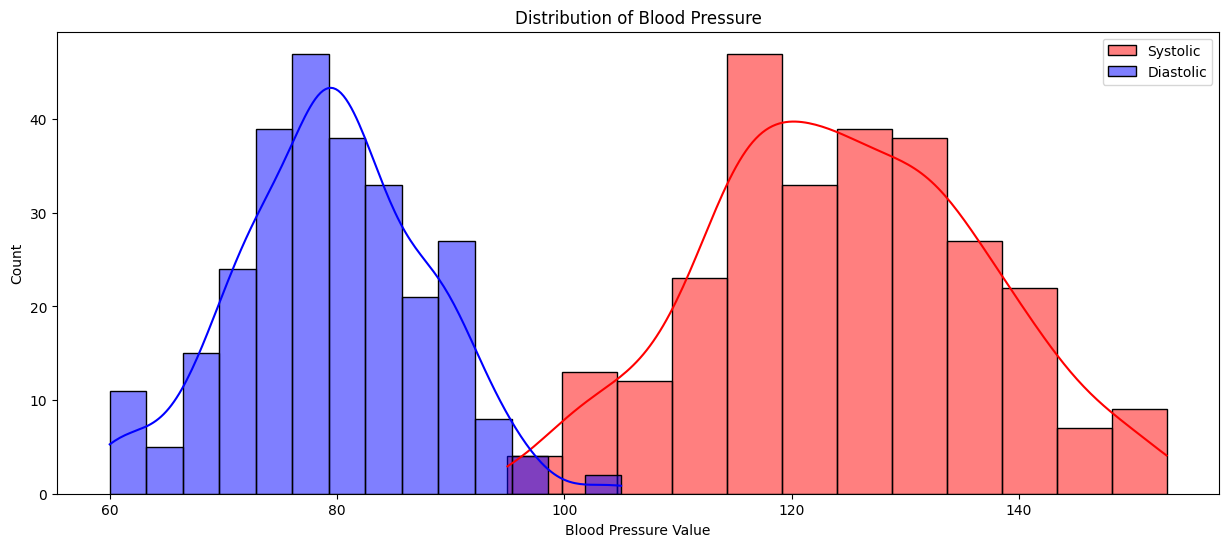

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(data['bp_systolic'], kde=True, color="red", label="Systolic")
sns.histplot(data['bp_diastolic'], kde=True, color="blue", label="Diastolic")
plt.title("Distribution of Blood Pressure")
plt.xlabel("Blood Pressure Value")
plt.ylabel("Count")
plt.legend()
plt.show()



>  يظهر الرسم البياني أن قيم ضغط الدم الانقباضي والانبساطي تتوزع بشكل طبيعي تقريبًا، مع تركز معظم القيم حول المتوسطات الخاصة بها.



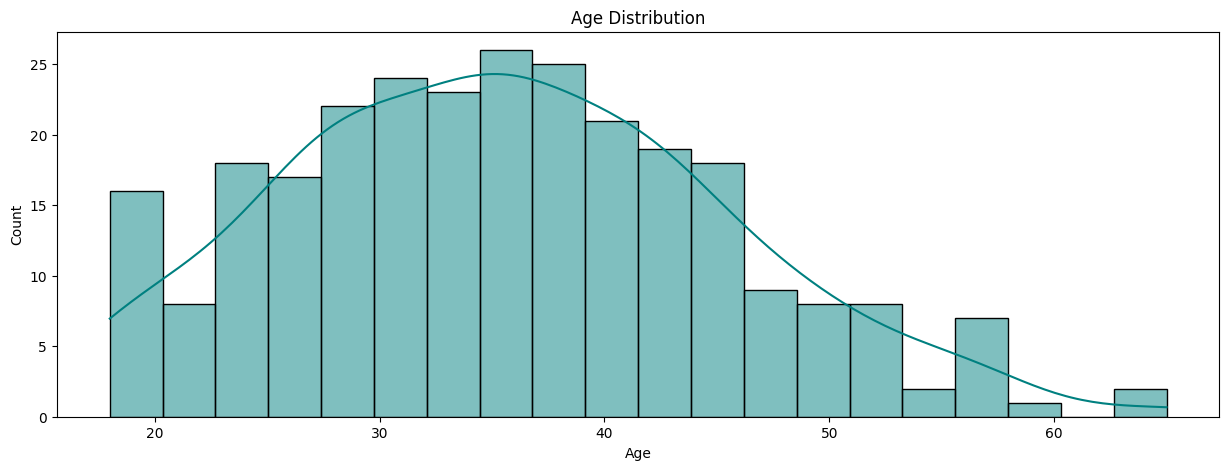

In [ ]:
# Exploratory Data Analysis

plt.figure(figsize=(15,5))
sns.histplot(data['age'], bins=20, kde=True ,color='teal')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()



>  يظهر توزيع الأعمار في الرسم البياني أنه يميل إلى التوزيع الطبيعي تقريبًا، مع تركز أكبر للأفراد في الفئة العمرية بين 25 و 45 عامً



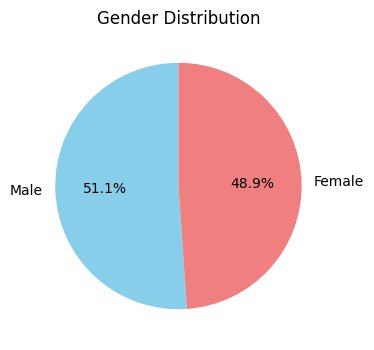

In [ ]:
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Gender Distribution")
plt.show()

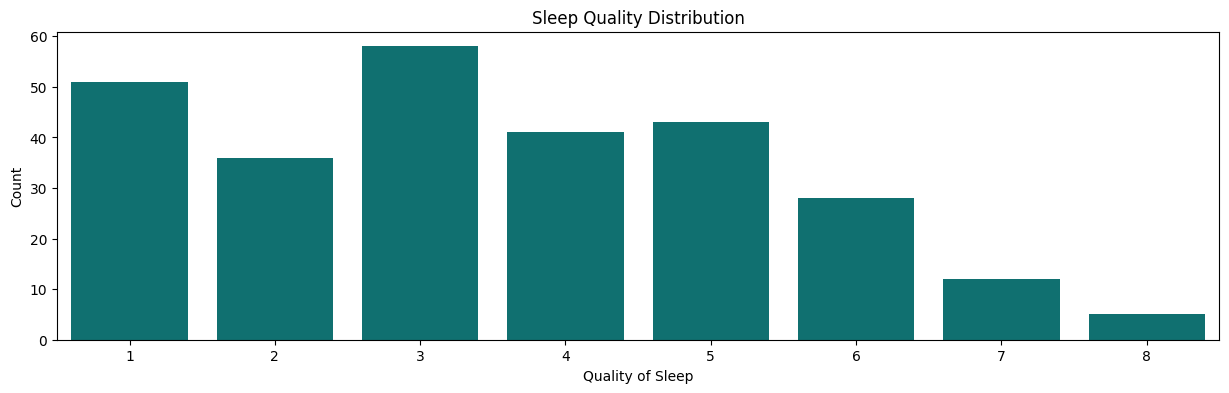

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(x='quality of sleep', data=data, color='teal')
plt.title("Sleep Quality Distribution")
plt.xlabel("Quality of Sleep")
plt.ylabel("Count")
plt.show()



> يوضح الرسم البياني توزيع جودة النوم بين الأفراد، حيث تتركز معظم التقييمات حول الدرجات 3 و 5



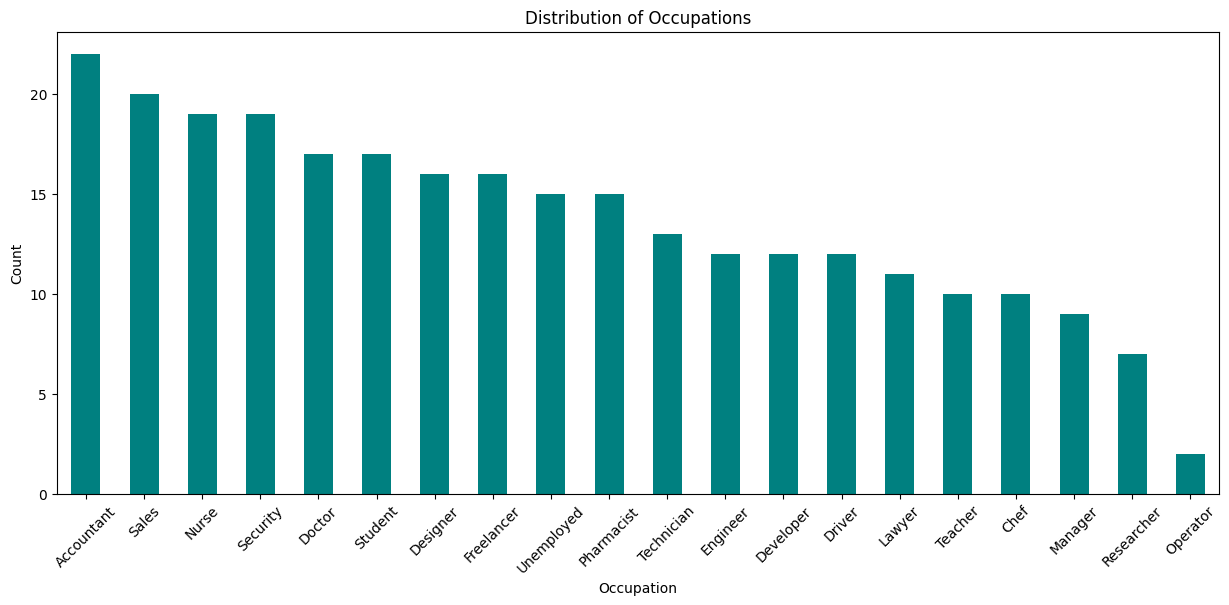

In [ ]:
plt.figure(figsize=(15, 6))
data['occupations'].value_counts().plot(kind='bar', color='teal')
plt.title("Distribution of Occupations")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

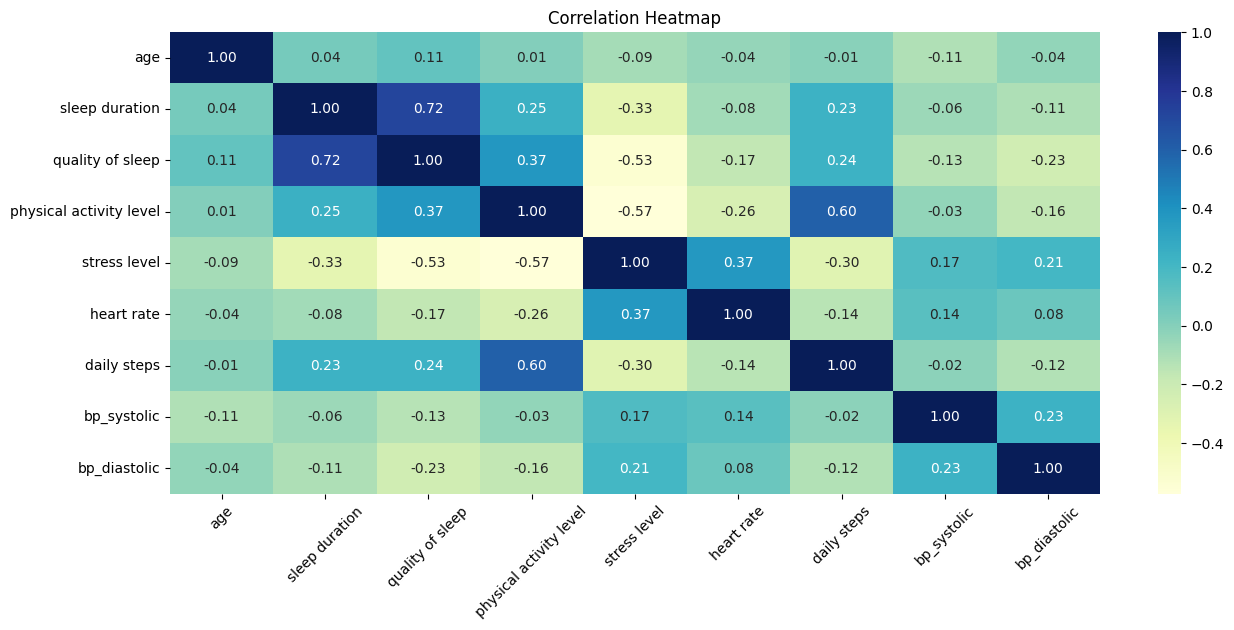

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

**القيم القريبة من 1 أو -1 تشير إلى ارتباط قوي موجب أو سالب على التوالي، بينما القيم القريبة من 0 تشير إلى ارتباط ضعيف أو لا يوجد ارتباط.**

*   نلاحظ ارتباطًا إيجابيًا قويًا بين "sleep duration" (مدة النوم) و "quality of sleep" (جودة النوم).
*   يوجد ارتباط إيجابي معتدل بين "physical activity level" (مستوى النشاط البدني) و "quality of sleep" (جودة النوم) وكذلك مع "daily steps" (الخطوات اليومية).
*   يظهر ارتباط سلبي معتدل بين "stress level" (مستوى الإجهاد) و "quality of sleep" (جودة النوم) و "sleep duration" (مدة النوم).
*   تظهر الارتباطات بين ضغط الدم (الانقباضي والانبساطي) والمتغيرات الأخرى ارتباطات ضعيفة إلى معتدلة في الغالب.





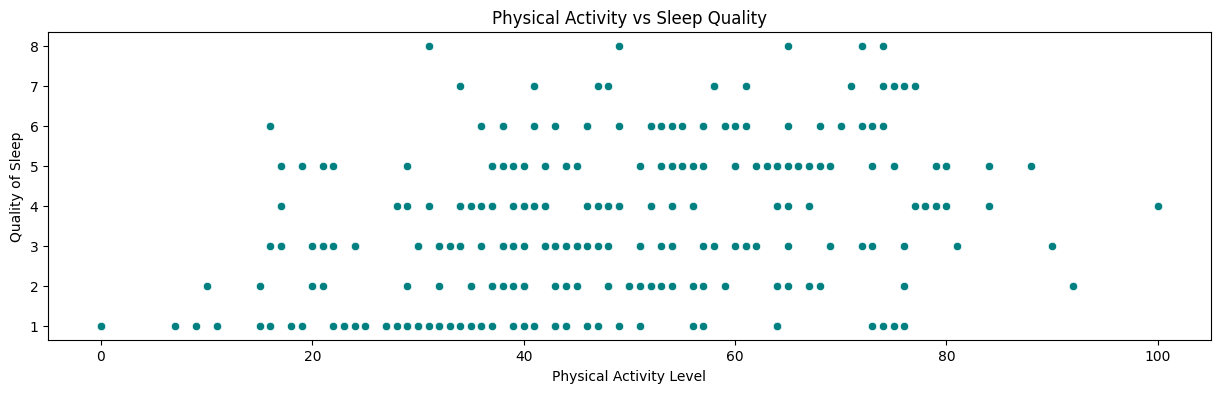

In [ ]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='physical activity level', y='quality of sleep', data=data, color='teal') # Added color
plt.title("Physical Activity vs Sleep Quality")
plt.xlabel("Physical Activity Level")
plt.ylabel("Quality of Sleep")
plt.show()



> بشكل عام، هناك اتجاه يشير إلى أن الأفراد الذين يمارسون مستويات أعلى من النشاط البدني يميلون إلى الحصول على جودة نوم أفضل.
ومع ذلك، هناك تباين كبير في جودة النوم عند مستويات مختلفة من النشاط البدني، مما يشير إلى أن عوامل أخرى تؤثر أيضًا على جودة النوم.
تتركز معظم نقاط البيانات في مستويات نشاط بدني متوسطة إلى عالية.



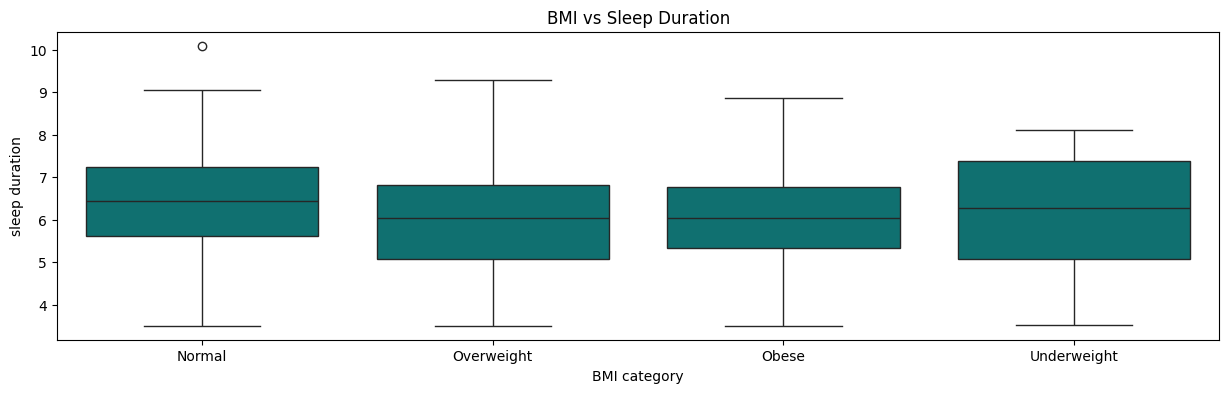

In [ ]:
plt.figure(figsize=(15,4))
sns.boxplot(x='BMI category', y='sleep duration', data=data, color='teal')
plt.title("BMI vs Sleep Duration")
plt.show()



> يبدو أن الأفراد في فئة "Normal" و "Underweight" يميلون إلى الحصول على متوسط مدة نوم أطول قليلاً مقارنة بفئتي "Overweight" و "Obese".
فئة "Normal" لديها أيضًا نطاق أوسع من مدة النوم مقارنة بالفئات الأخرى.
هذه الملاحظات تشير إلى وجود علاقة محتملة بين مؤشر كتلة الجسم ومدة النوم، على الرغم من أنها قد لا تكون علاقة قوية جدًا بناءً على هذا الرسم البياني وحده.





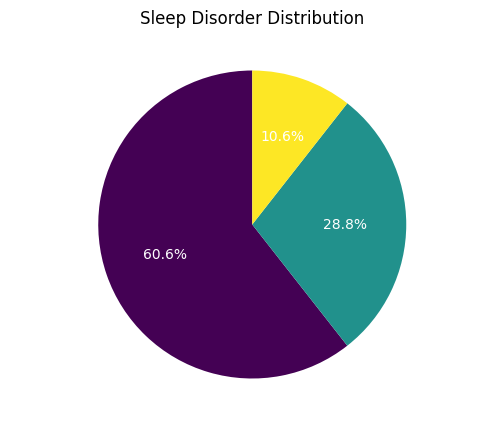

In [ ]:
plt.figure(figsize=(7,5))
data['sleep Disorder'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis',textprops={'color': 'white'}) # Added cmap
plt.title("Sleep Disorder Distribution")
plt.ylabel("")
plt.show()



>
الغالبية العظمى من الأفراد في هذه المجموعة البيانات لا يعانون من اضطرابات النوم (60.6%).
من بين الذين يعانون من اضطرابات النوم، يعتبر الأرق (Insomnia) هو الأكثر شيوعًا بنسبة 28.8%.
يأتي انقطاع التنفس أثناء النوم (Sleep Apnea) في المرتبة الثانية بنسبة 10.6%.
تشير هذه النتائج إلى أن اضطرابات النوم موجودة لدى أقلية من المشاركين في هذه الدراسة، وأن الأرق هو الاضطراب الأكثر انتشارًا بين هذه المجموعة.



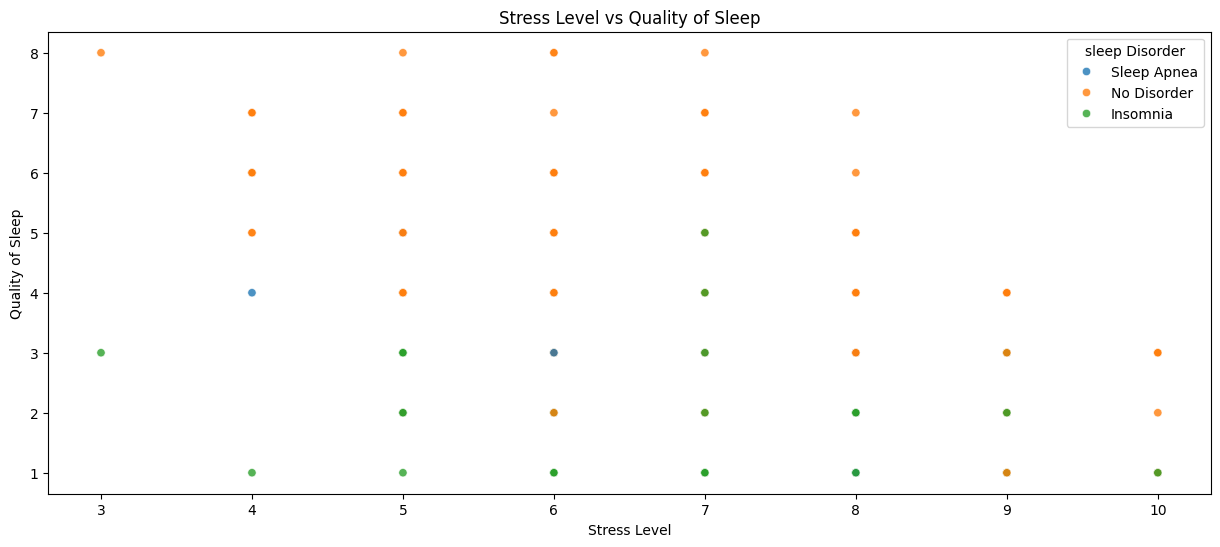

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(
    data=data,
    x="stress level",
    y="quality of sleep",
    hue="sleep Disorder",
    alpha=0.8,
    palette='tab10'
)
plt.title("Stress Level vs Quality of Sleep")
plt.xlabel("Stress Level")
plt.ylabel("Quality of Sleep")
plt.show()



> بشكل عام، هناك اتجاه واضح يشير إلى أن زيادة مستوى الإجهاد ترتبط بانخفاض جودة النوم.
الأفراد الذين لا يعانون من اضطرابات النوم (No Disorder) يميلون إلى الحصول على جودة نوم أعلى عبر مستويات مختلفة من الإجهاد مقارنة بالأفراد الذين يعانون من اضطرابات النوم.
الأفراد الذين يعانون من الأرق (Insomnia) يميلون إلى الحصول على جودة نوم منخفضة بشكل عام، ويبدو أن مستوى الإجهاد يؤثر عليهم بشكل كبير، حيث تنخفض جودة النوم لديهم مع زيادة الإجهاد.
الأفراد الذين يعانون من انقطاع التنفس أثناء النوم (Sleep Apnea) يظهرون تباينًا في جودة النوم ومستويات الإجهاد في هذه المجموعة البيانات.
هذا الرسم البياني يؤكد العلاقة السلبية بين الإجهاد وجودة النوم ويسلط الضوء على كيفية تأثير اضطرابات النوم على هذه العلاقة.



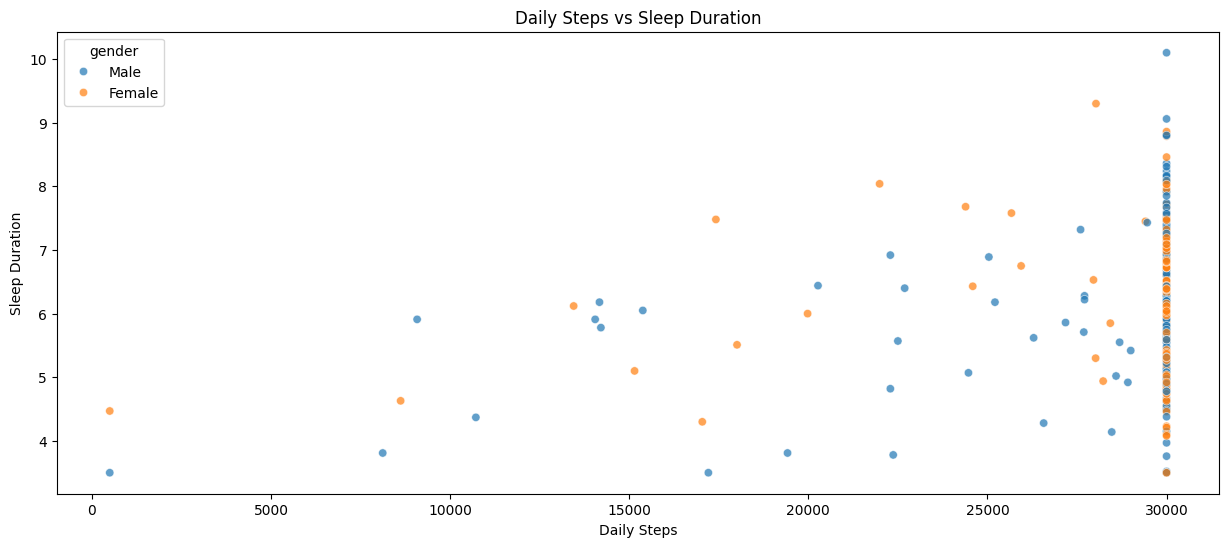

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=data, x="daily steps", y="sleep duration", hue="gender", alpha=0.7)
plt.title("Daily Steps vs Sleep Duration")
plt.xlabel("Daily Steps")
plt.ylabel("Sleep Duration")
plt.show()




>
بشكل عام، يبدو أن هناك اتجاهًا ضعيفًا يشير إلى أن زيادة عدد الخطوات اليومية قد تكون مرتبطة بزيادة طفيفة في مدة النوم.
تتركز معظم نقاط البيانات في عدد خطوات يومية مرتفع نسبيًا (حوالي 30000 خطوة).
لا يبدو أن هناك فرقًا كبيرًا في العلاقة بين الخطوات اليومية ومدة النوم بين الذكور والإناث بناءً على هذا الرسم البياني وحده.
يشير التباين الملحوظ في مدة النوم عند مستويات مختلفة من الخطوات اليومية إلى أن عوامل أخرى تؤثر أيضًا على مدة النوم.




#📌  Conclusion
من خلال تحليل البيانات الخاصة بالنوم والعوامل المختلفة لها، عدة مجالات مهمة
:

- النوم المثالي بين 7 – 8 ساعات يومياً لتحسين جودة النوم
- زيادة مستويات التوتر الإجهاد بانخفاض واضح في جودة النوم، خاصة عند الأشخاص الذين يعانون من اضطرابات مثل الأرق

- كتلة الجسم (BMI) تتميز بأنها ضعيفة الارتباط بدرجة النوم، حيث أن الأشخاص في الفئة "العادية" يميلون إلى أقل من الفئات "ذات الوزن الزائد" و"السمنة".
- النشاط (مستوى النشاط والخطوات اليومية) له تأثير إيجابي على مدة وجوده.

#  💡 Recommendations


1.     حاول الالتزام بمدة نوم تتراوح بين 7–8 ساعات يوميًا

2.    قلل من مستويات التوتر عبر أنشطة مثل التأمل أو تنظيم وقت العمل
3.   التزم بروتين نوم ثابت النوم والاستيقاظ في نفس الأوقات




